In [47]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'  # Дополнительная настройка
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

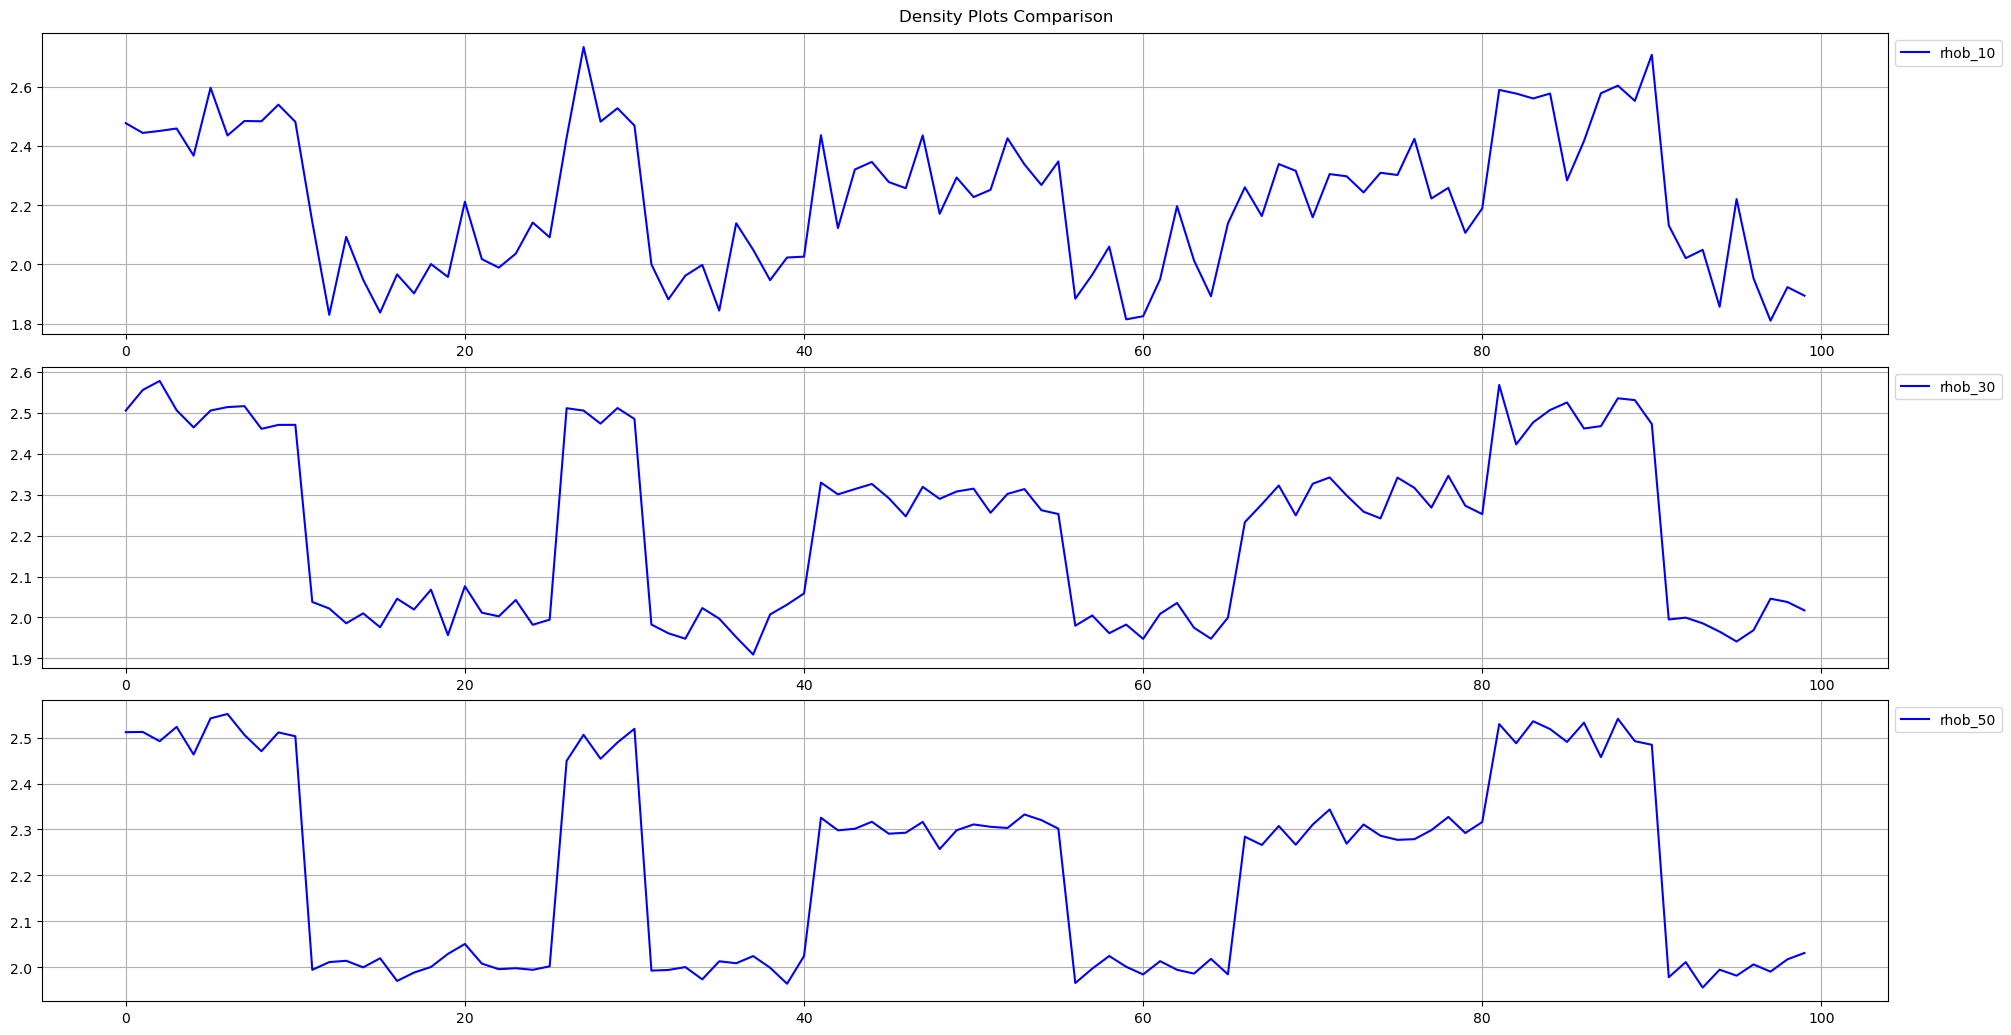

In [49]:

base_path = "D:/Master`s Degree/2_semester/homework/"
data_sources = {
    '10': f"{base_path}rhob_10.csv",
    '30': f"{base_path}rhob_30.csv", 
    '50': f"{base_path}rhob_50.csv"
}

# Загрузка всех данных в словарь
loaded_data = {k: np.loadtxt(v) for k, v in data_sources.items()}

# Создание графиков
figure, subplot_axes = plt.subplots(len(loaded_data), 1, 
                                   constrained_layout=True,
                                   figsize=(20, 10))

# Построение графиков для каждого набора данных
for (density, values), axis in zip(loaded_data.items(), subplot_axes):
    x_values = np.linspace(0, 99, num=100)  # Альтернатива np.arange
    line, = axis.plot(x_values, values, 'b-', 
                    label=f'rhob_{density}')
    axis.legend(bbox_to_anchor=(1, 1), loc='upper left')
    axis.grid(True)

plt.suptitle("Density Plots Comparison", y=1.02)
plt.show()

C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


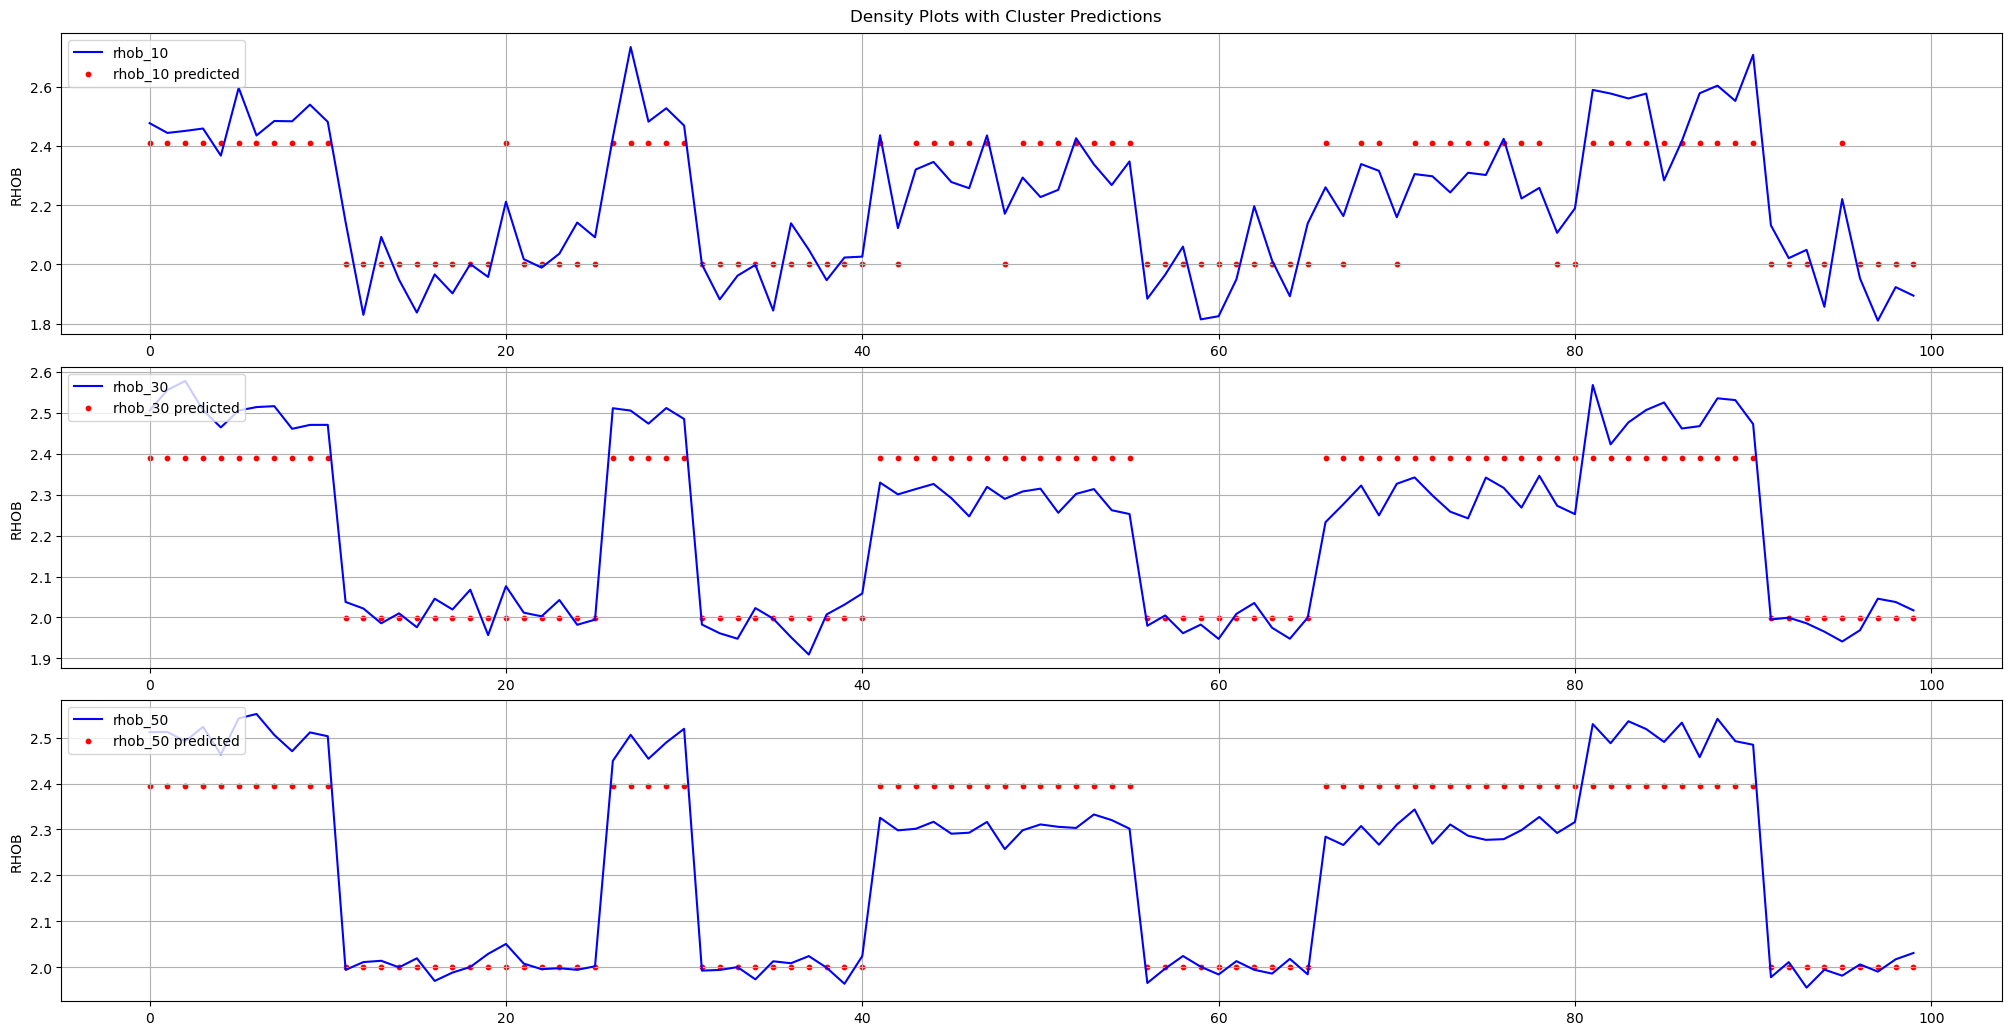

In [55]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'  # Дополнительная настройка
def data_dev(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    reshaped_data = data.reshape(-1, 1)
    kmeans.fit(reshaped_data)
    cluster_centers = kmeans.cluster_centers_.flatten()
    cluster_labels = kmeans.predict(reshaped_data)
    return np.array([cluster_centers[label] for label in cluster_labels])

# Создание графиков с предсказаниями
prediction_fig, prediction_axes = plt.subplots(len(loaded_data), 1, 
                                             figsize=(20, 10),
                                             constrained_layout=True)

for (density, values), ax in zip(loaded_data.items(), prediction_axes):
    x_vals = np.arange(0, 100, 1)
    ax.plot(x_vals, values, 'b-', label=f'rhob_{density}')
    ax.scatter(x_vals, data_dev(values, 2), c='r', s=10, 
              label=f'rhob_{density} predicted')
    ax.legend(loc='upper left')
    ax.set_ylabel("RHOB")
    ax.grid(True)

plt.suptitle("Density Plots with Cluster Predictions", y=1.02)
plt.show()


C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

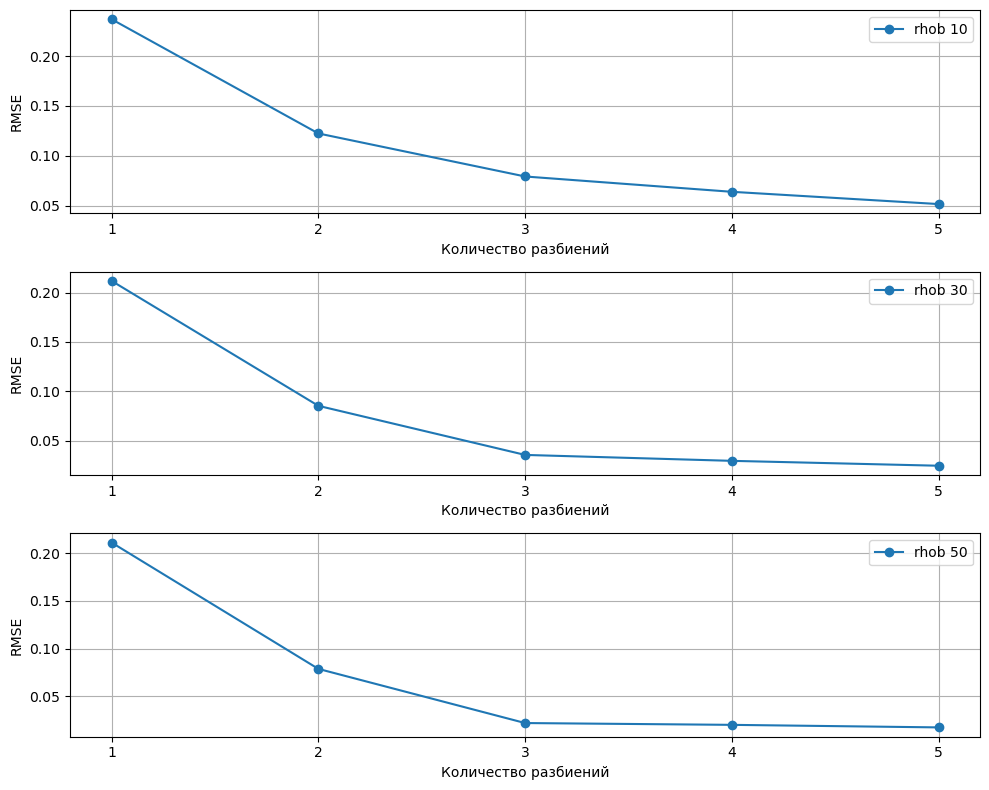

In [57]:
# Анализ RMSE для разных количеств кластеров
n_appr = np.arange(1, 6, 1)  # Количество кластеров от 1 до 5
rmse_results = {density: [RMSE(values, data_dev(values, n)) for n in n_appr] 
                for density, values in loaded_data.items()}

# Создание графиков RMSE
rmse_fig, rmse_axes = plt.subplots(len(loaded_data), 1, figsize=(10, 8))

for (density, rmse_values), ax in zip(rmse_results.items(), rmse_axes):
    ax.plot(n_appr, rmse_values, marker='o', label=f"rhob {density}")
    ax.legend(loc="upper right")
    ax.set_xlabel("Количество разбиений")
    ax.set_ylabel("RMSE")
    ax.set_xticks(n_appr)
    ax.locator_params(axis='y', nbins=5)
    ax.grid(True)

plt.tight_layout()
plt.show()

C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


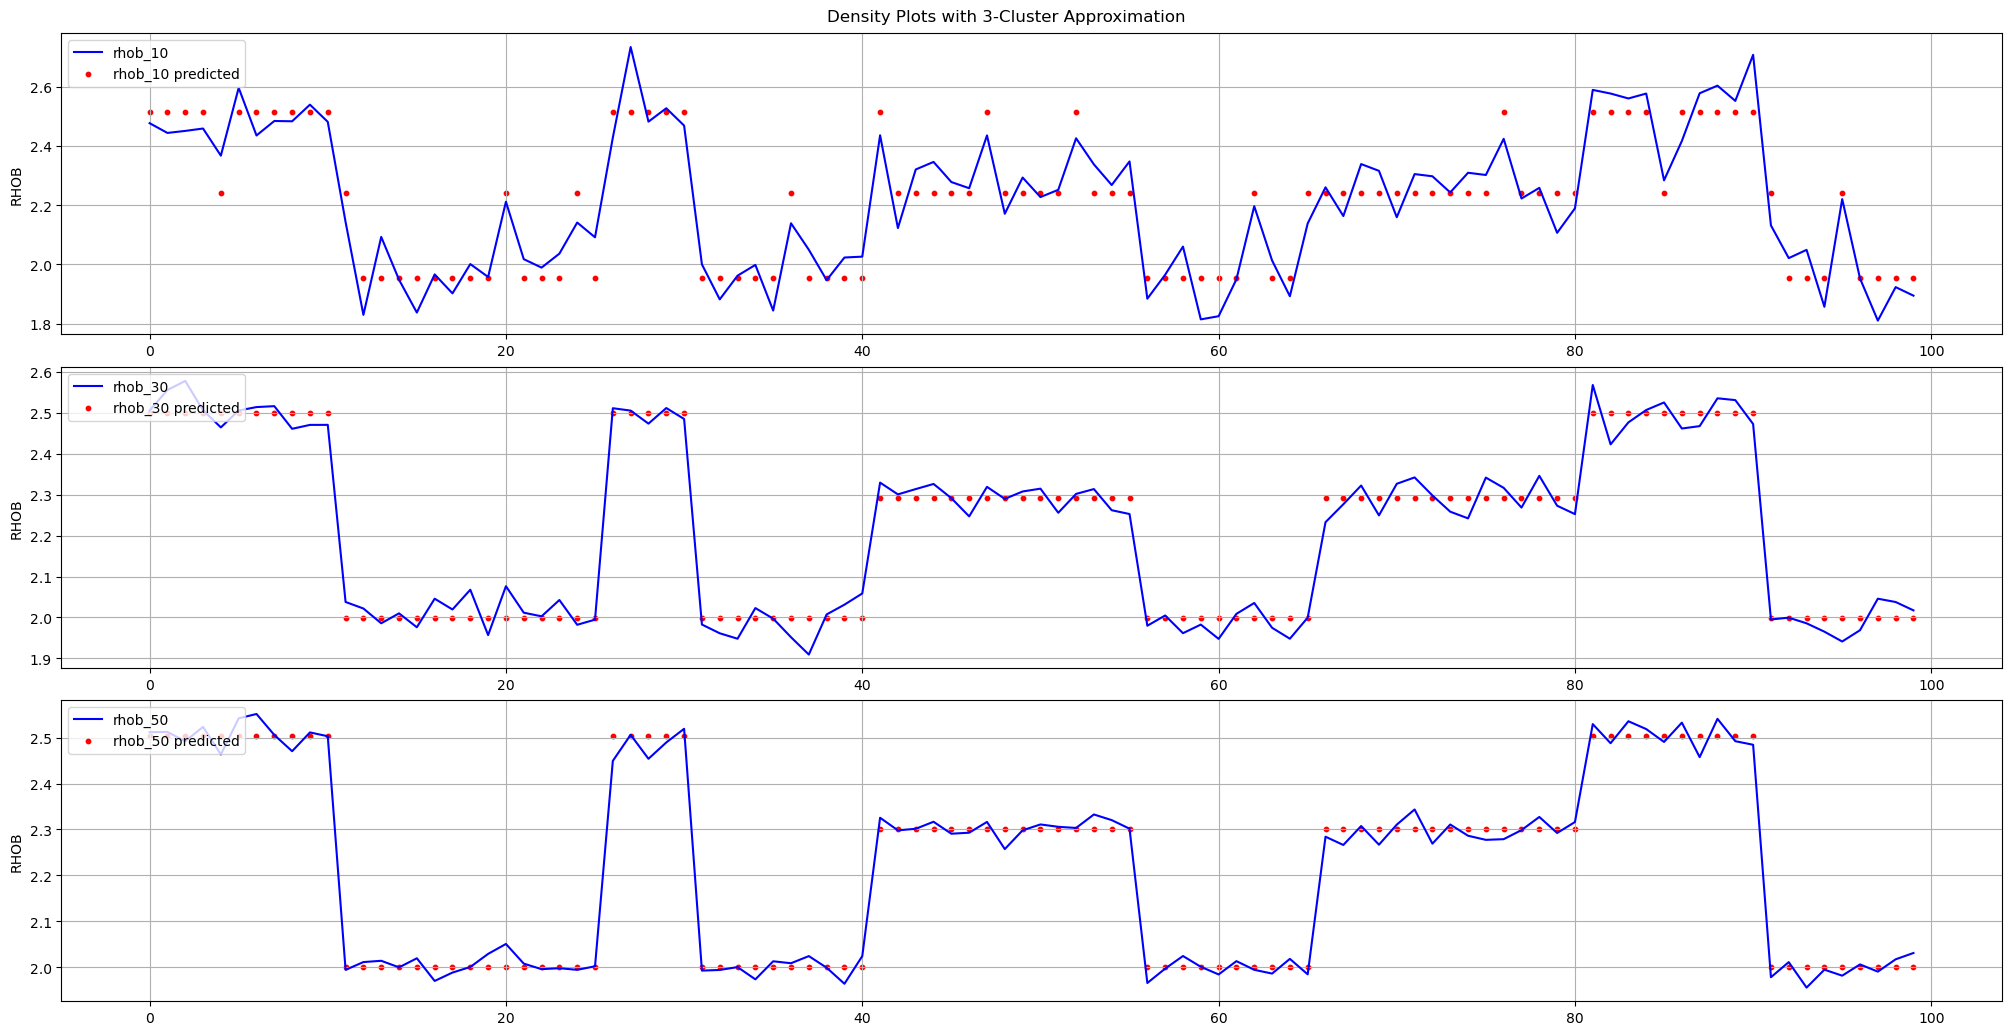

In [59]:
# Дополнительная визуализация с 3 кластерами (адаптация кода №1)
cluster_fig, cluster_axes = plt.subplots(len(loaded_data), 1, 
                                  figsize=(20, 10),
                                  constrained_layout=True)

for (density, values), ax in zip(loaded_data.items(), cluster_axes):
    x_vals = np.arange(0, 100, 1)
    ax.plot(x_vals, values, 'b-', label=f'rhob_{density}')
    ax.scatter(x_vals, data_dev(values, 3), c='r', s=10, 
             label=f'rhob_{density} predicted')
    ax.legend(loc='upper left')
    ax.set_ylabel("RHOB")
    ax.grid(True)

plt.suptitle("Density Plots with 3-Cluster Approximation", y=1.02)
plt.show()